In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, let's compute our first analytic solution:

In [13]:
l1 = 2/3
l2 = 1/3

#set it up so u[n] = u_n 
us = np.zeros(26)
for n in range(1,26):
    us[n] = l1 + l2*(-0.5)**n

In [14]:
us[25]

0.6666666567325592

Now lets check our solution by checking the other values of u

In [15]:
print(us)
print(us[2])

[0.         0.5        0.75       0.625      0.6875     0.65625
 0.671875   0.6640625  0.66796875 0.66601562 0.66699219 0.66650391
 0.66674805 0.66662598 0.66668701 0.66665649 0.66667175 0.66666412
 0.66666794 0.66666603 0.66666698 0.66666651 0.66666675 0.66666663
 0.66666669 0.66666666]
0.75


My numbers are off what I calculated by hand, They actually seem just offset, I need to fix my solution. But I want to find where the error in my solution lies, so I'll test to see if its before or after the difference equation.

In [26]:
#let u[n] be prob of hitting 25 given you start at n
u = np.zeros(27)
u[25] = 1
print(u)
for n in range(24,0,-1):
    u[n] = 0.5*u[n+1] + 0.5*u[n+2]
    
    #print(u[n]) 
print(u)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0.]
[0.         0.66666669 0.66666663 0.66666675 0.66666651 0.66666698
 0.66666603 0.66666794 0.66666412 0.66667175 0.66665649 0.66668701
 0.66662598 0.66674805 0.66650391 0.66699219 0.66601562 0.66796875
 0.6640625  0.671875   0.65625    0.6875     0.625      0.75
 0.5        1.         0.        ]


In [20]:
u[25]

1.0

In [21]:
u[24]

0.5

So this does work - mistake must be in solving the difference equation.

Having fixed my solution - let me check my new solution agrees with hand calculated values and my difference equation solution, and even some random simulations!

In [27]:
l1 = 2/3
l2 = -2/3

#set it up so u[n] = u_n 
us = np.zeros(26)
for n in range(1,26):
    us[n] = l1 + l2*(-0.5)**n

In [28]:
print(us)

[0.         1.         0.5        0.75       0.625      0.6875
 0.65625    0.671875   0.6640625  0.66796875 0.66601562 0.66699219
 0.66650391 0.66674805 0.66662598 0.66668701 0.66665649 0.66667175
 0.66666412 0.66666794 0.66666603 0.66666698 0.66666651 0.66666675
 0.66666663 0.66666669]


In [30]:
us[1], us[2], us[3], us[4], us[5]

(1.0, 0.5, 0.75, 0.625, 0.6875)

In [31]:
#AHA! One can see these agree with what I had by hand!

In [32]:
us[25]

0.6666666865348816

In [34]:
#So this is my correct value (hopefully). 

In [40]:
print(u[::-1])
print(us)

[0.         1.         0.5        0.75       0.625      0.6875
 0.65625    0.671875   0.6640625  0.66796875 0.66601562 0.66699219
 0.66650391 0.66674805 0.66662598 0.66668701 0.66665649 0.66667175
 0.66666412 0.66666794 0.66666603 0.66666698 0.66666651 0.66666675
 0.66666663 0.66666669 0.        ]
[0.         1.         0.5        0.75       0.625      0.6875
 0.65625    0.671875   0.6640625  0.66796875 0.66601562 0.66699219
 0.66650391 0.66674805 0.66662598 0.66668701 0.66665649 0.66667175
 0.66666412 0.66666794 0.66666603 0.66666698 0.66666651 0.66666675
 0.66666663 0.66666669]


In [41]:
#Clearly the above vectors have the same probabilities, so this means 
#should have the correct solution!

As a third check, and leading into an exntension/generalisation, let us actually the simulate the random walks themselves in their entirety

In [59]:
np.random.randint(1,3) #will return either 1 or 2 with equal probabilities

1

In [61]:
def sim1():
    node = 1
    nodes_hit = [1]
    x=0
    while node not in [25,26]:
        node+=x    
        nodes_hit.append(node)
        #print(node)
        x = np.random.randint(1,3)
        
    return nodes_hit
    
    
    
for i in range(10):
    x = sim1()
    print(x, x[-1])
    #can get whole sim and whether it hit 25 or not looking at final value as if it hits 25 it stops on 25
    

[1, 1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 22, 23, 24, 25] 25
[1, 1, 3, 4, 6, 7, 8, 10, 12, 13, 14, 16, 18, 20, 22, 24, 25] 25
[1, 1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 15, 17, 19, 21, 22, 24, 26] 26
[1, 1, 3, 5, 6, 8, 10, 12, 13, 15, 17, 18, 20, 21, 23, 24, 25] 25
[1, 1, 2, 3, 4, 5, 7, 8, 10, 12, 14, 16, 18, 20, 21, 22, 23, 24, 25] 25
[1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 19, 20, 21, 23, 25] 25
[1, 1, 2, 3, 5, 7, 8, 9, 11, 13, 15, 16, 18, 20, 22, 24, 26] 26
[1, 1, 2, 4, 5, 7, 8, 10, 12, 14, 16, 18, 20, 21, 22, 23, 24, 26] 26
[1, 1, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 18, 20, 22, 23, 24, 26] 26
[1, 1, 3, 4, 5, 7, 8, 10, 11, 12, 14, 15, 17, 19, 20, 21, 23, 25] 25


In [63]:
total_sims = 50000
counter = 0
for i in range(total_sims):
    #print(sim1())
    if sim1()[-1] == 25:
        counter+=1
    else:
        counter = counter
        
print(f"Of {total_sims} many simulations, we land on 25 {100*counter/total_sims} percent of the time")
        

Of 50000 many simulations, we land on 25 66.652 percent of the time


This tends to be around 66.7 so we have another good check we have found the correct probability.

We can now utilise this simulation for generalising, what if we want to hit a node that isnt 25, and what if we want to change the probability from 1/2

In [67]:
def sim2(end):
    node = 1
    nodes_hit = [1]
    x=0
    while node not in [end,end+1]:
        node+=x    
        nodes_hit.append(node)
        #print(node)
        x = np.random.randint(1,3)
        
    return nodes_hit
    
    
end = 45
for i in range(10):
    x = sim2(end)
    print(x, x[-1])
#again can change the above to work with any end value

[1, 1, 3, 4, 6, 8, 10, 12, 14, 15, 17, 19, 21, 23, 25, 27, 29, 31, 32, 34, 36, 38, 40, 42, 43, 44, 45] 45
[1, 1, 3, 4, 6, 7, 9, 10, 12, 13, 14, 16, 18, 20, 22, 23, 24, 26, 28, 30, 32, 34, 36, 37, 38, 39, 41, 43, 45] 45
[1, 1, 2, 4, 6, 8, 9, 11, 13, 15, 17, 19, 21, 22, 23, 25, 27, 28, 30, 31, 32, 34, 36, 38, 40, 41, 43, 44, 46] 46
[1, 1, 2, 4, 6, 7, 9, 11, 13, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 31, 33, 34, 35, 37, 38, 40, 42, 43, 45] 45
[1, 1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 26, 28, 30, 31, 33, 34, 35, 36, 38, 39, 41, 43, 44, 45] 45
[1, 1, 3, 5, 6, 8, 9, 10, 11, 13, 15, 17, 18, 19, 20, 22, 23, 24, 25, 27, 29, 31, 33, 35, 37, 38, 39, 40, 41, 43, 44, 46] 46
[1, 1, 2, 4, 6, 8, 10, 12, 13, 14, 15, 16, 18, 20, 21, 23, 25, 26, 27, 29, 31, 33, 35, 37, 39, 40, 42, 43, 45] 45
[1, 1, 2, 4, 6, 7, 8, 9, 11, 12, 13, 15, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 33, 34, 36, 38, 39, 40, 41, 43, 44, 45] 45
[1, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 15, 16

In [69]:
total_sims = 10000
counter = 0
end = 3
for i in range(total_sims):
    #print(sim1())
    if sim2(end)[-1] == end:
        counter+=1
    else:
        counter = counter
        
print(f"Of {total_sims} many simulations, we land on {end} {100*counter/total_sims} percent of the time")
        

Of 10000 many simulations, we land on 3 75.41 percent of the time


In [70]:
#agrees with all the above calculations we did!

In [71]:
total_sims = 10000
counter = 0
end = 45
for i in range(total_sims):
    #print(sim1())
    if sim2(end)[-1] == end:
        counter+=1
    else:
        counter = counter
        
print(f"Of {total_sims} many simulations, we land on {end} {100*counter/total_sims} percent of the time")
        

Of 10000 many simulations, we land on 45 66.75 percent of the time


In [72]:
#so we can find this value, which also passes a sanity check as we expect the probability to tend to 66.66... as our final value gets large~

now lets allow different probabilities:

In [75]:
def sim3(end,p):
    #end is value we want to hit, p is the prob of moving one square, hence 1-p is prob of moving 2.
    node = 1
    nodes_hit = [1]
    x=0
    while node not in [end,end+1]:
        node+=x    
        nodes_hit.append(node)
        #print(node)
        x = np.random.binomial(size=1,n=1, p=1-p)[0]+1 #p in binom is prob of moving 2 squares, we change it with 1-p so p is prob of going 1 square
        
    return nodes_hit

In [74]:
sim3(10,0.5)

[1, 1, 3, 5, 6, 7, 9, 10]

In [78]:
total_sims = 10000
counter = 0
end = 25
p=0.5
for i in range(total_sims):
    #print(sim1())
    if sim3(end,p)[-1] == end:
        counter+=1
    else:
        counter = counter
        
print(f"Of {total_sims} many simulations, we land on {end} {100*counter/total_sims} percent of the time")
#gut check, should give around 66.7

Of 10000 many simulations, we land on 25 66.71 percent of the time


In [76]:
total_sims = 10000
counter = 0
end = 3
p=0.3
for i in range(total_sims):
    #print(sim1())
    if sim3(end,p)[-1] == end:
        counter+=1
    else:
        counter = counter
        
print(f"Of {total_sims} many simulations, we land on {end} {100*counter/total_sims} percent of the time")
        

Of 10000 many simulations, we land on 3 78.64 percent of the time


interesting, I would like to see some simulations of different ends and different p's before getting stuck into extension more.

In [79]:
total_sims = 10000

ends = [2,3,5,10,25,40,60]
ps =[0.2,0.4,0.6,0.8]


for end in ends:
    for p in ps:
        counter = 0
        for i in range(total_sims):
            #print(sim1())
            if sim3(end,p)[-1] == end:
                counter+=1
            else:
                counter = counter

        print(f"Of {total_sims} simulations with p = {p}, we land on {end} {100*counter/total_sims} percent of the time")
        

Of 10000 simulations with p = 0.2, we land on 2 20.91 percent of the time
Of 10000 simulations with p = 0.4, we land on 2 40.29 percent of the time
Of 10000 simulations with p = 0.6, we land on 2 60.25 percent of the time
Of 10000 simulations with p = 0.8, we land on 2 79.89 percent of the time
Of 10000 simulations with p = 0.2, we land on 3 83.94 percent of the time
Of 10000 simulations with p = 0.4, we land on 3 75.72 percent of the time
Of 10000 simulations with p = 0.6, we land on 3 75.54 percent of the time
Of 10000 simulations with p = 0.8, we land on 3 83.82 percent of the time
Of 10000 simulations with p = 0.2, we land on 5 74.0 percent of the time
Of 10000 simulations with p = 0.4, we land on 5 67.96 percent of the time
Of 10000 simulations with p = 0.6, we land on 5 72.7 percent of the time
Of 10000 simulations with p = 0.8, we land on 5 83.58 percent of the time
Of 10000 simulations with p = 0.2, we land on 10 49.12 percent of the time
Of 10000 simulations with p = 0.4, we l

Interesting!!

Now, I want to plot the probability of hitting 25 based on the value of p.

In [80]:
total_sims = 10000

ends = [25]
ps =np.linspace(0,1,100)
#print(ps)
prob_list = []

for end in ends:
    for p in ps:
        counter = 0
        for i in range(total_sims):
            #print(sim1())
            if sim3(end,p)[-1] == end:
                counter+=1
            else:
                counter = counter

        #print(f"Of {total_sims} simulations with p = {p}, we land on {end} {100*counter/total_sims} percent of the time")
        prob_list.append(counter/total_sims)

In [82]:
f = (-1+(ps-1)**(25))/(ps-2) #analytic solution i computed (adding this after simulating)
#print(f)

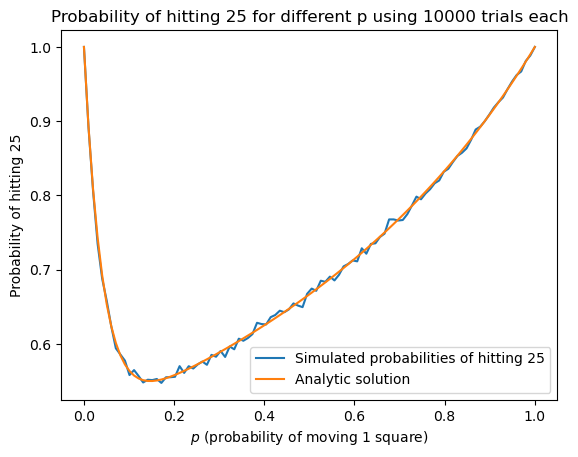

In [86]:
plt.plot(ps, prob_list, label = "Simulated probabilities of hitting 25")
plt.plot(ps,f, label = "Analytic solution")
plt.xlabel("$p$ (probability of moving 1 square)")
plt.ylabel("Probability of hitting 25")
plt.title(f"Probability of hitting {ends[0]} for different p using {total_sims} trials each")
plt.legend()
plt.show()

How interesting, the shapes match but are also an interesting shape